## Airline Dataset 

### Hierarchical

In [2]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
airlines = pd.read_csv('EastWestAirlines.csv')
airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
airline = airlines.iloc[:,1:] 

In [5]:
airline.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
airline['Qual_miles'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       0
4       0
       ..
3994    0
3995    0
3996    0
3997    0
3998    0
Name: Qual_miles, Length: 3999, dtype: int64>

In [7]:
#Normalisation function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [9]:
df_norm = norm_func(airline.iloc[:,1:])

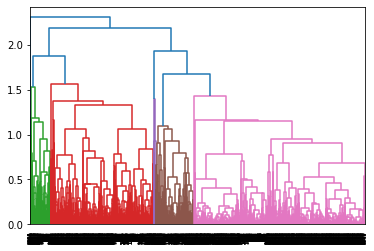

In [10]:
dandogram = sch.dendrogram(sch.linkage(df_norm, method="complete",metric='euclidean'))

In [11]:
# create clusters
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='complete')

In [12]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
clusters = pd.DataFrame(y_hc,columns=['clusters'])

In [13]:
clusters.value_counts()

clusters
0           3995
1              4
dtype: int64

###  pycaret

In [14]:
from pycaret.clustering import *

### Hierarchical clustering

In [32]:
exp = setup(data = airline)
hierarchical = create_model('hclust')
hierarchical_df = assign_model(hierarchical)
hierarchical_df

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6124,5595.7168,0.6124,0,0,0


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,Cluster 0
1,19244,0,1,1,1,215,2,0,0,6968,0,Cluster 0
2,41354,0,1,1,1,4123,4,0,0,7034,0,Cluster 0
3,14776,0,1,1,1,500,1,0,0,6952,0,Cluster 0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,Cluster 0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,Cluster 0
3995,64385,0,1,1,1,981,5,0,0,1395,1,Cluster 0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,Cluster 0
3997,54899,0,1,1,1,500,1,500,1,1401,0,Cluster 0


In [33]:
hierarchical_df.Cluster.value_counts()

Cluster 0    3215
Cluster 1     624
Cluster 3     134
Cluster 2      26
Name: Cluster, dtype: int64

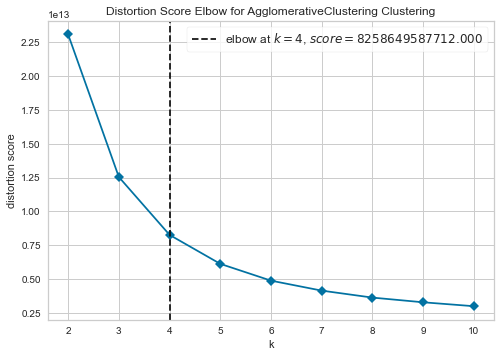

In [52]:
plot_model(hierarchical, plot='elbow')

In [42]:
evaluate_model(hierarchical)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

### K-means 

In [36]:
kmeans = create_model('kmeans')
kmeans_df = assign_model(kmeans)
kmeans_df

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5901,6246.3688,0.621,0,0,0


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,Cluster 2
1,19244,0,1,1,1,215,2,0,0,6968,0,Cluster 2
2,41354,0,1,1,1,4123,4,0,0,7034,0,Cluster 2
3,14776,0,1,1,1,500,1,0,0,6952,0,Cluster 2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,Cluster 0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,Cluster 2
3995,64385,0,1,1,1,981,5,0,0,1395,1,Cluster 2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,Cluster 2
3997,54899,0,1,1,1,500,1,500,1,1401,0,Cluster 2


In [37]:
kmeans_df.Cluster.value_counts()

Cluster 2    2800
Cluster 0     988
Cluster 1     185
Cluster 3      26
Name: Cluster, dtype: int64

In [41]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

### Density-Based Spatial clustering
### DB-scan

In [46]:
dbscan = create_model('dbscan',num_clusters=4)
dbscan_df = assign_model(dbscan)
dbscan_df

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,Cluster -1
1,19244,0,1,1,1,215,2,0,0,6968,0,Cluster -1
2,41354,0,1,1,1,4123,4,0,0,7034,0,Cluster -1
3,14776,0,1,1,1,500,1,0,0,6952,0,Cluster -1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,Cluster -1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,Cluster -1
3995,64385,0,1,1,1,981,5,0,0,1395,1,Cluster -1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,Cluster -1
3997,54899,0,1,1,1,500,1,500,1,1401,0,Cluster -1


In [48]:
dbscan_df.Cluster.value_counts()

Cluster -1    3999
Name: Cluster, dtype: int64

In [51]:
evaluate_model(dbscan)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

### dbscan by sklearn 

In [53]:
#normalisation of data
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [54]:
df_norm = norm_func(airline)

In [55]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [56]:
stscaler = StandardScaler().fit(df_norm)
x = stscaler.transform(df_norm)

In [57]:
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [99]:
dbscan= DBSCAN(eps=0.8, min_samples=4)
dbscan.fit(x)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=4, n_jobs=None, p=None)

In [100]:
dbscan.labels_

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [101]:
dbscan_cluster = pd.DataFrame(dbscan.labels_,columns=['Cluster'])

In [102]:
dbscan_cluster

,Cluster
0,0
1,0
2,0
3,0
4,1
...,...
3994,2
3995,2
3996,2
3997,0


In [103]:
dbscan_cluster.value_counts()

Cluster
 0         2246
 2          971
-1          721
 7           12
 1            9
 11           8
 3            6
 10           6
 8            5
 5            4
 6            4
 9            4
 4            3
dtype: int64